In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
import sklearn as sklearn

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

This notebook is prepared for Tip Amount Prediction. Since the data was cleaned and prepared for the analysis, nothing is done related with data wrangling.

In [4]:

data = pd.read_csv(r"C:\Users\HYDR5\workspace\python\NYC_taxi_F_sarigoz.csv")


In [5]:
data.head(5)

,Unnamed: 0,VendorID,Pickup_datetime,Dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,...,Extra,MTA_tax,Tip_amount,Tolls_amount,improvement_surcharge,Total_amount,Payment_type,Trip_type,Trip_duration,Pickup_hour
0,0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,...,0.0,0.0,1.95,0.0,0.0,9.75,1,2,0.066667,0
1,1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,...,0.0,0.0,0.00,0.0,0.0,45.00,1,2,0.066667,0
2,2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,...,0.5,0.5,0.50,0.0,0.3,5.80,1,1,2.566667,0
3,3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,...,0.5,0.5,0.00,0.0,0.3,6.30,2,1,4.100000,0
4,4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,...,0.5,0.5,0.00,0.0,0.3,6.30,2,1,4.100000,0


In [6]:
data.describe()

,Unnamed: 0,VendorID,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,improvement_surcharge,Total_amount,Payment_type,Trip_type,Trip_duration,Pickup_hour
count,1.474276e+06,1.474276e+06,1.474276e+06,1.474276e+06,1.474276e+06,1.474276e+06,1.474276e+06,1.474276e+06,1.474276e+06,1.474276e+06,1.474276e+06,1.474276e+06,1.474276e+06,1.474276e+06,1.474276e+06,1.474276e+06,1.474276e+06,1.474276e+06,1.474276e+06,1.474276e+06
mean,7.469167e+05,1.784410e+00,1.082191e+00,-7.393529e+01,4.074852e+01,-7.393447e+01,4.074623e+01,1.371407e+00,2.971919e+00,1.260991e+01,3.539320e-01,4.901606e-01,1.239132e+00,1.231547e-01,2.941995e-01,1.511064e+01,1.535257e+00,1.018782e+00,1.355599e+01,1.354762e+01
std,4.317364e+05,4.112311e-01,5.559203e-01,4.391997e-02,5.711289e-02,5.224972e-02,5.801486e-02,1.040781e+00,3.017149e+00,9.865794e+00,3.653460e-01,6.944705e-02,2.363130e+00,8.860281e-01,4.130978e-02,1.133957e+01,5.168471e-01,1.357547e-01,1.531562e+01,6.796250e+00
min,0.000000e+00,1.000000e+00,1.000000e+00,-8.327788e+01,3.935694e+01,-8.327783e+01,3.942936e+01,0.000000e+00,0.000000e+00,1.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.726608e+05,2.000000e+00,1.000000e+00,-7.395972e+01,4.069912e+01,-7.396802e+01,4.069899e+01,1.000000e+00,1.100000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.190000e+00,1.000000e+00,1.000000e+00,6.216667e+00,9.000000e+00
50%,7.467125e+05,2.000000e+00,1.000000e+00,-7.394550e+01,4.074673e+01,-7.394522e+01,4.074724e+01,1.000000e+00,1.980000e+00,9.500000e+00,5.000000e-01,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.176000e+01,2.000000e+00,1.000000e+00,1.041667e+01,1.500000e+01
75%,1.120922e+06,2.000000e+00,1.000000e+00,-7.391765e+01,4.080242e+01,-7.391055e+01,4.078981e+01,1.000000e+00,3.740000e+00,1.550000e+01,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,3.000000e-01,1.830000e+01,2.000000e+00,1.000000e+00,1.715000e+01,1.900000e+01
max,1.494925e+06,2.000000e+00,6.000000e+00,-7.100427e+01,4.317726e+01,-7.100425e+01,4.246009e+01,9.000000e+00,1.347000e+02,5.000000e+02,1.000000e+00,5.000000e-01,3.000000e+02,9.575000e+01,3.000000e-01,5.000000e+02,5.000000e+00,2.000000e+00,5.999167e+02,2.300000e+01


Before conducting any prediction model, I am trying to understand relationships in data. To do this correlation and heatmap used. First, I entered all the data, then by filtering data I try to see the impacts and find strong relationship with tip amount. 

In [7]:
data.corr () 

,Unnamed: 0,VendorID,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,improvement_surcharge,Total_amount,Payment_type,Trip_type,Trip_duration,Pickup_hour
Unnamed: 0,1.000000,-0.004444,-0.006424,-0.018382,0.000508,-0.010320,-0.001845,-0.006136,-0.009793,-0.008711,0.009325,0.006350,0.010639,-0.011481,0.008207,-0.005903,-0.023753,-0.006584,0.002023,0.023041
VendorID,-0.004444,1.000000,0.020498,0.045493,0.046412,0.034136,0.038459,0.081974,0.005329,0.006390,0.008214,-0.018427,-0.005558,0.006192,-0.012031,0.005000,-0.031162,0.019764,0.008769,0.014549
RateCodeID,-0.006424,0.020498,1.000000,0.101244,0.102324,0.091189,0.093317,-0.001909,0.053333,0.157700,-0.138143,-0.964842,-0.002238,0.041415,-0.941657,0.126182,0.029846,0.957805,0.018734,-0.020202
Pickup_longitude,-0.018382,0.045493,0.101244,1.000000,0.237338,0.716734,0.198744,0.006221,0.011709,0.001947,0.002353,-0.093666,-0.106589,0.019508,-0.093609,-0.019836,0.172600,0.094441,-0.032063,-0.020069
Pickup_latitude,0.000508,0.046412,0.102324,0.237338,1.000000,0.130627,0.846145,-0.029971,-0.053207,-0.065836,-0.072836,-0.099177,-0.094714,0.040915,-0.096900,-0.077127,0.088361,0.100029,-0.066190,-0.006506
Dropoff_longitude,-0.010320,0.034136,0.091189,0.716734,0.130627,1.000000,0.134024,0.004002,0.088192,0.048507,0.020691,-0.065316,-0.088102,-0.009500,-0.074960,0.023092,0.170444,0.075380,-0.026518,-0.027018
Dropoff_latitude,-0.001845,0.038459,0.093317,0.198744,0.846145,0.134024,1.000000,-0.026330,-0.113762,-0.111158,-0.071064,-0.094905,-0.109739,0.018340,-0.094715,-0.121364,0.096399,0.097503,-0.087891,-0.007887
Passenger_count,-0.006136,0.081974,-0.001909,0.006221,-0.029971,0.004002,-0.026330,1.000000,0.012345,0.011524,0.019366,0.002315,0.004859,0.007728,0.002915,0.012291,-0.000297,-0.002522,0.008227,0.009628
Trip_distance,-0.009793,0.005329,0.053333,0.011709,-0.053207,0.088192,-0.113762,0.012345,1.000000,0.876373,-0.041366,-0.032914,0.408870,0.326708,-0.017977,0.871616,-0.146313,0.018276,0.545434,-0.034098
Fare_amount,-0.008711,0.006390,0.157700,0.001947,-0.065836,0.048507,-0.111158,0.011524,0.876373,1.000000,-0.062419,-0.128914,0.419315,0.291785,-0.107689,0.977031,-0.144666,0.109810,0.563264,-0.019629


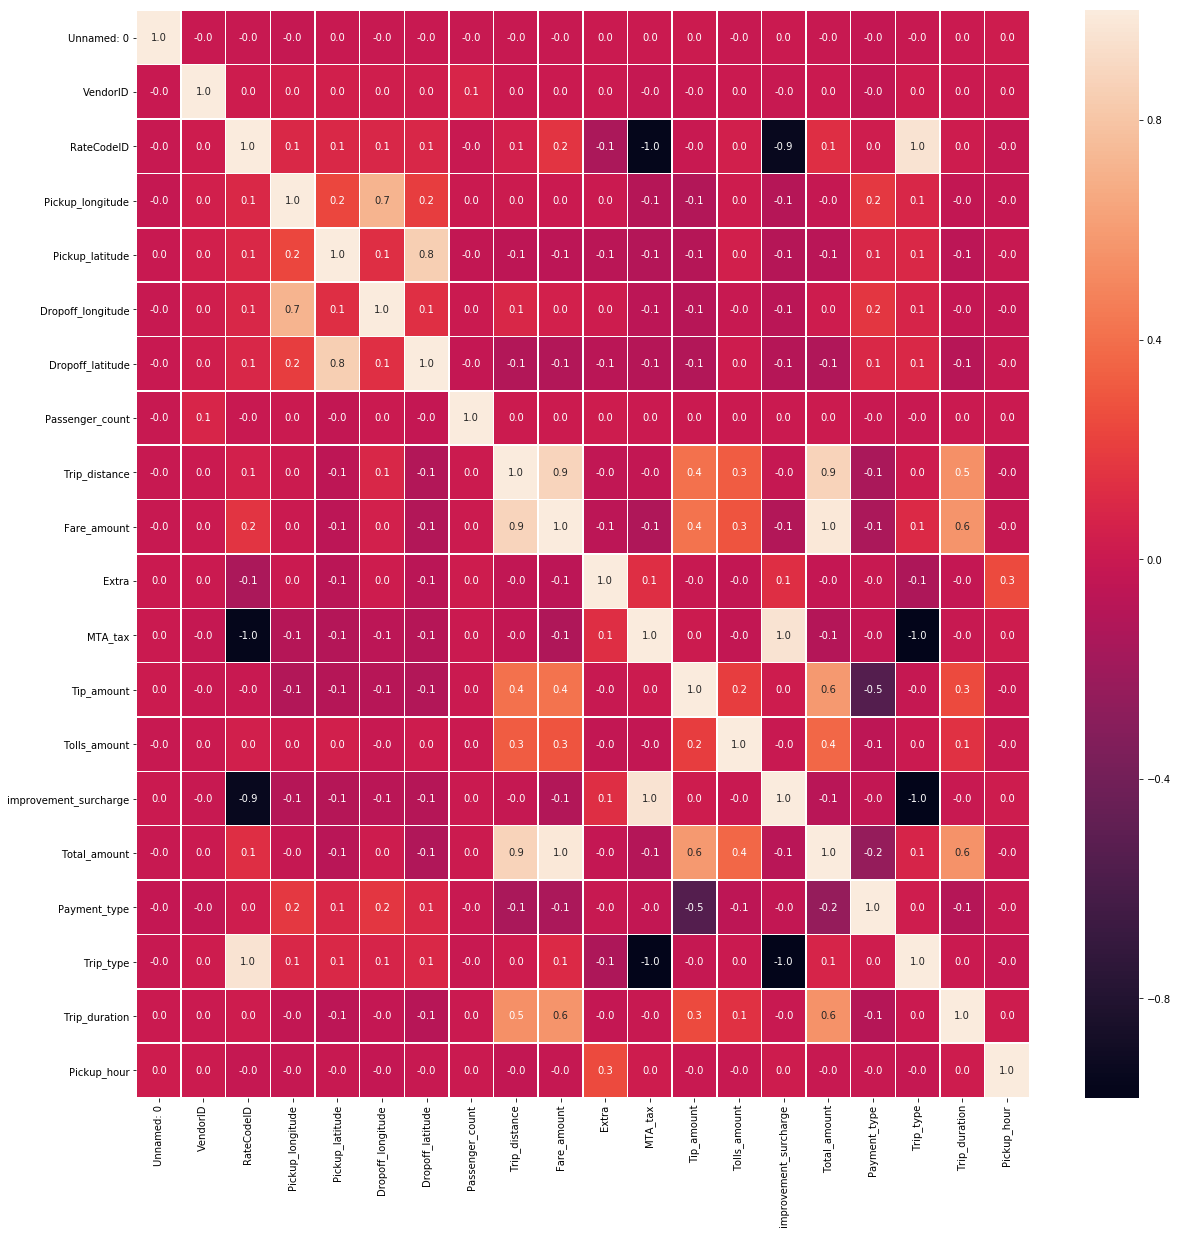

In [69]:
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

when I examined the heatmap, in the first step, Tip amount has correlations with Trip distance, fare amount and total amount. But these are not strong enough. In order to make more accurate predicitions first we have to clarify patterns.

In [8]:
data.columns

Index(['Unnamed: 0', 'VendorID', 'Pickup_datetime', 'Dropoff_datetime',
       'Store_and_fwd_flag', 'RateCodeID', 'Pickup_longitude',
       'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude',
       'Passenger_count', 'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax',
       'Tip_amount', 'Tolls_amount', 'improvement_surcharge', 'Total_amount',
       'Payment_type', 'Trip_type', 'Trip_duration', 'Pickup_hour'],
      dtype='object')

In this part, I will look scatter plots to understand relationship.

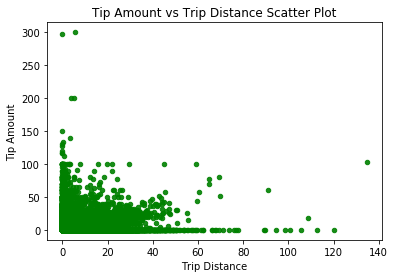

In [9]:
# Scatter Plot 
# x = Trip duration , y = tip amount
data.plot(kind='scatter', x='Trip_distance', y='Tip_amount',alpha = 0.9,color = 'green')
plt.xlabel('Trip Distance')              # label = name of label
plt.ylabel('Tip Amount')
plt.title('Tip Amount vs Trip Distance Scatter Plot')            # title = title of plot
plt.show ()

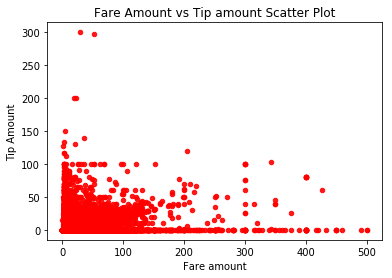

In [10]:
# x = Fare amount , y = tip amount
data.plot(kind='scatter', x='Fare_amount', y='Tip_amount',alpha = 0.9,color = 'red')
plt.xlabel('Fare amount')              # label = name of label
plt.ylabel('Tip Amount')
plt.title('Fare Amount vs Tip amount Scatter Plot')            # title = title of plot
plt.show ()

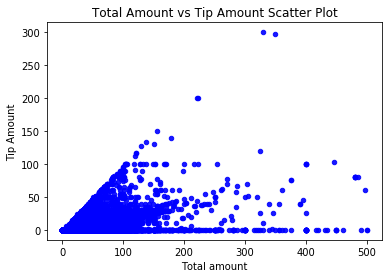

In [13]:
# x = Total amount , y = tip amount
data.plot(kind='scatter', x='Total_amount', y='Tip_amount',alpha = 0.9,color = 'blue')
plt.xlabel('Total amount')              # label = name of label
plt.ylabel('Tip Amount')
plt.title('Total Amount vs Tip Amount Scatter Plot')            # title = title of plot
plt.show ()

Another subject that I wonder is whether payment type affect the tip amount. Or in the different type of payments, the relationship between tip amounts and other variables change. In order to check the change, I look for heatmaps for each payment type. 

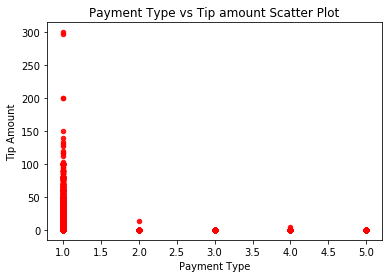

In [15]:
# x = Payment type , y = tip amount
data.plot(kind='scatter', x='Payment_type', y='Tip_amount',alpha = 0.9,color = 'red')
plt.xlabel('Payment Type')              # label = name of label
plt.ylabel('Tip Amount')
plt.title('Payment Type vs Tip amount Scatter Plot')            # title = title of plot
plt.show ()

In [75]:
#z = data['Tip_amount']==1
#data2 = data [z]
#type(data2)

In [76]:
#df = pd.DataFrame(data2)
#df.describe()

In [77]:
#df.corr () 

In [78]:
#f,ax = plt.subplots(figsize=(20, 20))
#sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
#plt.show()

In [19]:
data.Payment_type.value_counts()

2    772331
1    695248
3      3371
4      3261
5        65
Name: Payment_type, dtype: int64

In [20]:
payment_type_one = data.Payment_type == 1
data[payment_type_one].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 695248 entries, 0 to 1474275
Data columns (total 23 columns):
Unnamed: 0               695248 non-null int64
VendorID                 695248 non-null int64
Pickup_datetime          695248 non-null object
Dropoff_datetime         695248 non-null object
Store_and_fwd_flag       695248 non-null object
RateCodeID               695248 non-null int64
Pickup_longitude         695248 non-null float64
Pickup_latitude          695248 non-null float64
Dropoff_longitude        695248 non-null float64
Dropoff_latitude         695248 non-null float64
Passenger_count          695248 non-null int64
Trip_distance            695248 non-null float64
Fare_amount              695248 non-null float64
Extra                    695248 non-null float64
MTA_tax                  695248 non-null float64
Tip_amount               695248 non-null float64
Tolls_amount             695248 non-null float64
improvement_surcharge    695248 non-null float64
Total_amount     

In [18]:
data[payment_type_one].corr()

,Unnamed: 0,VendorID,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,improvement_surcharge,Total_amount,Payment_type,Trip_type,Trip_duration,Pickup_hour
Unnamed: 0,1.000000,-0.002515,-0.008639,-0.024938,0.000323,-0.012452,-0.002107,-0.006839,-0.019448,-0.017059,0.010681,0.008435,-0.005131,-0.016782,0.010454,-0.016367,NaN,-0.008885,-0.003334,0.024190
VendorID,-0.002515,1.000000,0.032042,0.056916,0.052184,0.039879,0.042576,0.091564,-0.004096,-0.002111,0.008735,-0.029614,-0.015729,0.007695,-0.023989,-0.004614,NaN,0.032068,-0.003610,0.011300
RateCodeID,-0.008639,0.032042,1.000000,0.123017,0.090150,0.113161,0.074870,-0.008919,0.012870,0.194044,-0.122903,-0.964336,0.029355,0.059406,-0.936687,0.162265,NaN,0.957592,-0.031579,-0.028358
Pickup_longitude,-0.024938,0.056916,0.123017,1.000000,0.281433,0.627025,0.217308,-0.004405,0.052469,0.046658,0.008395,-0.108731,-0.015250,0.044465,-0.109050,0.038501,NaN,0.111114,-0.023015,-0.013752
Pickup_latitude,0.000323,0.052184,0.090150,0.281433,1.000000,0.124710,0.789977,-0.031904,-0.028016,-0.038845,-0.065924,-0.086402,-0.079634,0.059165,-0.083399,-0.047851,NaN,0.087145,-0.061366,-0.005326
Dropoff_longitude,-0.012452,0.039879,0.113161,0.627025,0.124710,1.000000,0.121583,-0.005997,0.133805,0.090016,0.023320,-0.069051,0.016451,0.008126,-0.086822,0.079380,NaN,0.088294,-0.023805,-0.023150
Dropoff_latitude,-0.002107,0.042576,0.074870,0.217308,0.789977,0.121583,1.000000,-0.027063,-0.093599,-0.083747,-0.069277,-0.079270,-0.101544,0.033387,-0.079960,-0.092332,NaN,0.083298,-0.078637,-0.013050
Passenger_count,-0.006839,0.091564,-0.008919,-0.004405,-0.031904,-0.005997,-0.027063,1.000000,0.011189,0.009650,0.019929,0.008551,0.011701,0.007404,0.008969,0.011907,NaN,-0.008661,0.006923,0.011350
Trip_distance,-0.019448,-0.004096,0.012870,0.052469,-0.028016,0.133805,-0.093599,0.011189,1.000000,0.882058,-0.057091,0.014223,0.529286,0.333228,0.037684,0.879221,NaN,-0.038934,0.583768,-0.042980
Fare_amount,-0.017059,-0.002111,0.194044,0.046658,-0.038845,0.090016,-0.083747,0.009650,0.882058,1.000000,-0.084804,-0.168058,0.549019,0.299481,-0.138722,0.976868,NaN,0.141197,0.614327,-0.032266


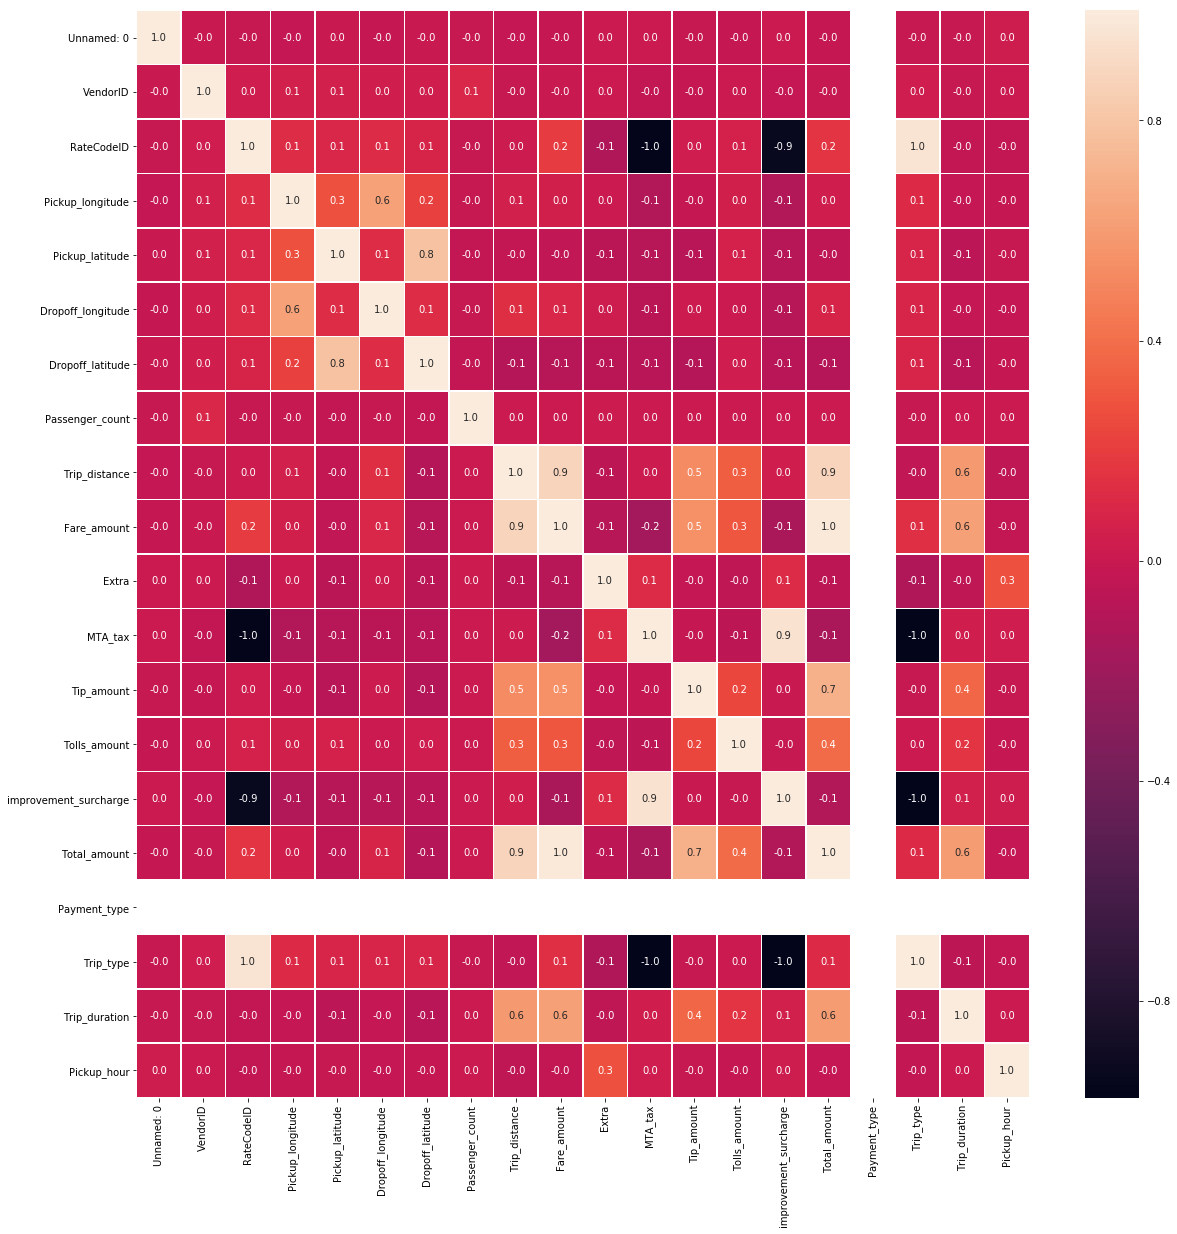

In [21]:
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(data[payment_type_one].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

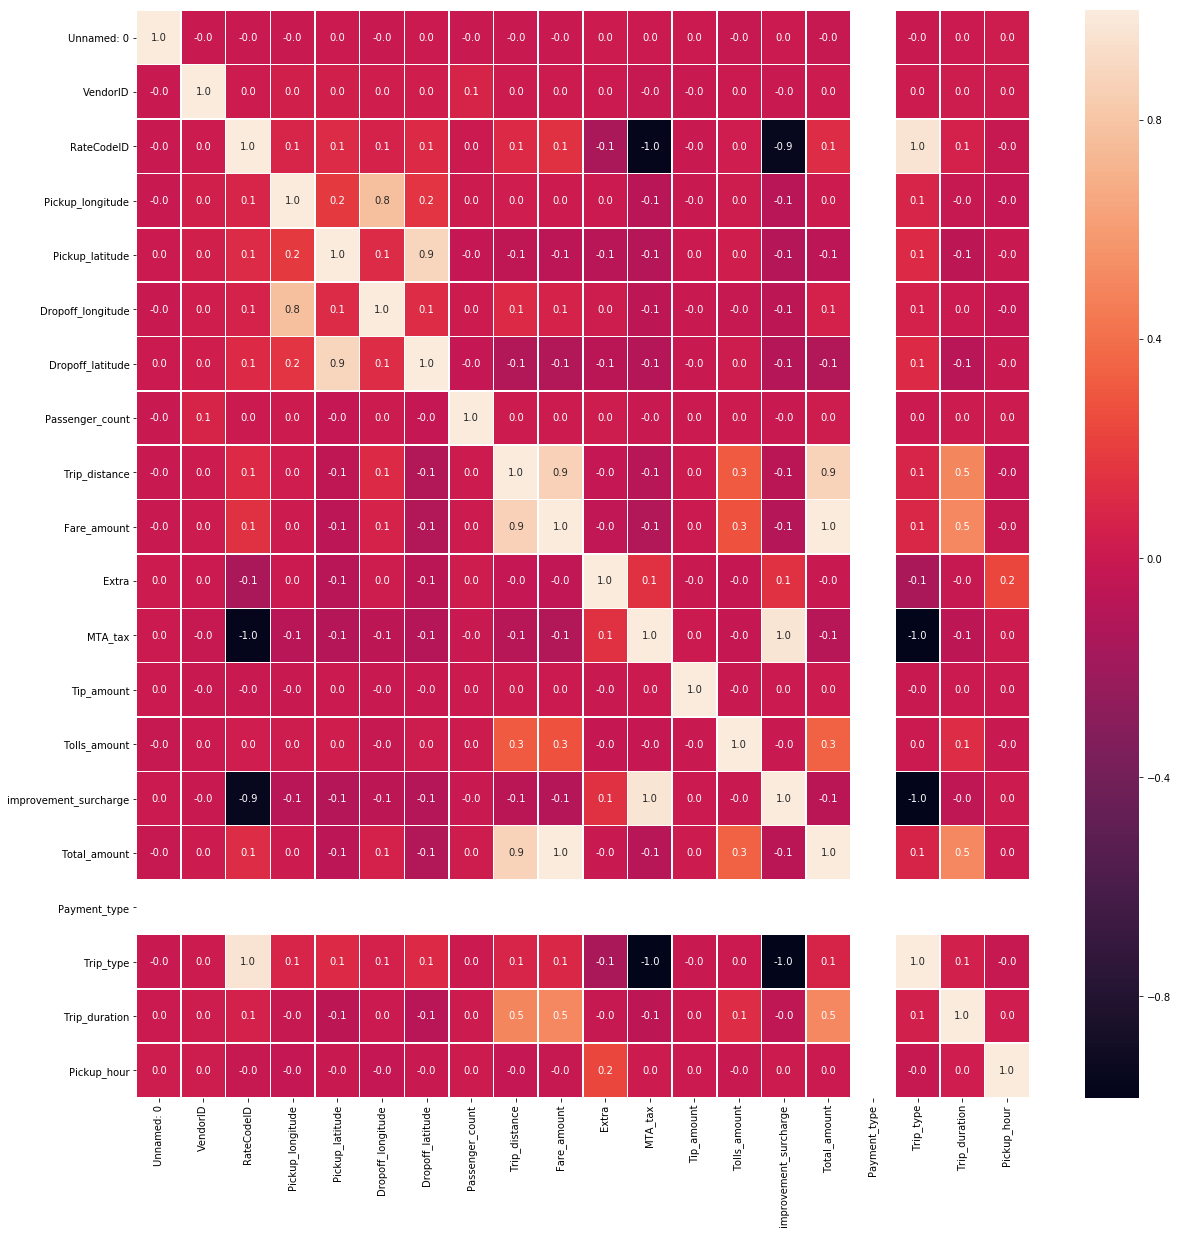

In [83]:
payment_type_two = data.Payment_type == 2

f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(data[payment_type_two].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

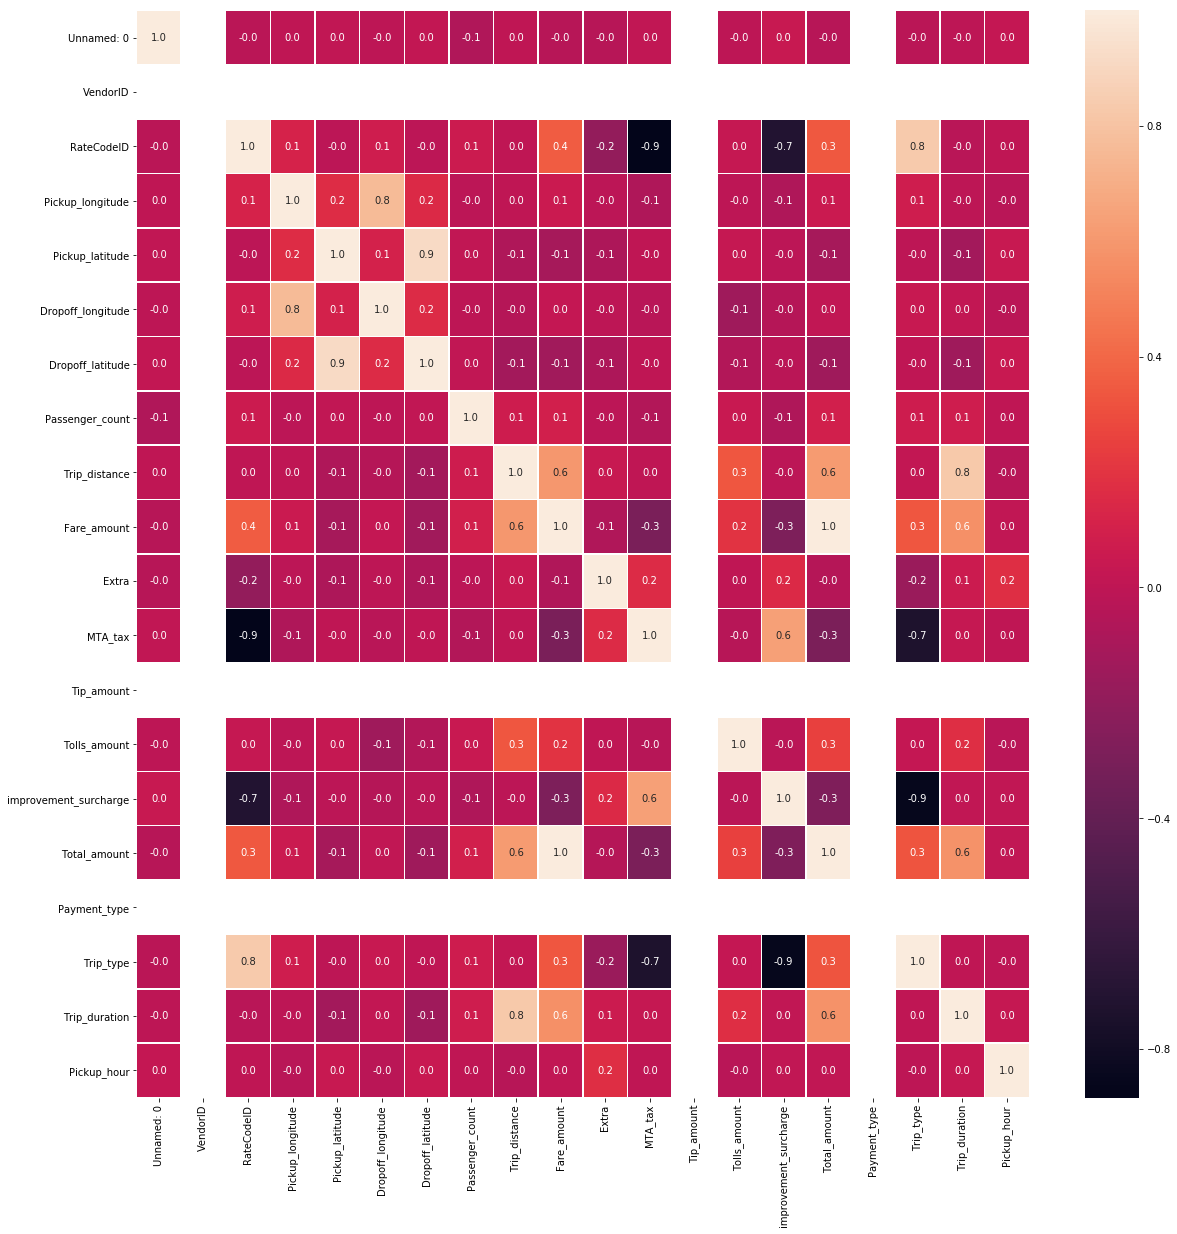

In [22]:
payment_type_three = data.Payment_type == 3

f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(data[payment_type_three].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

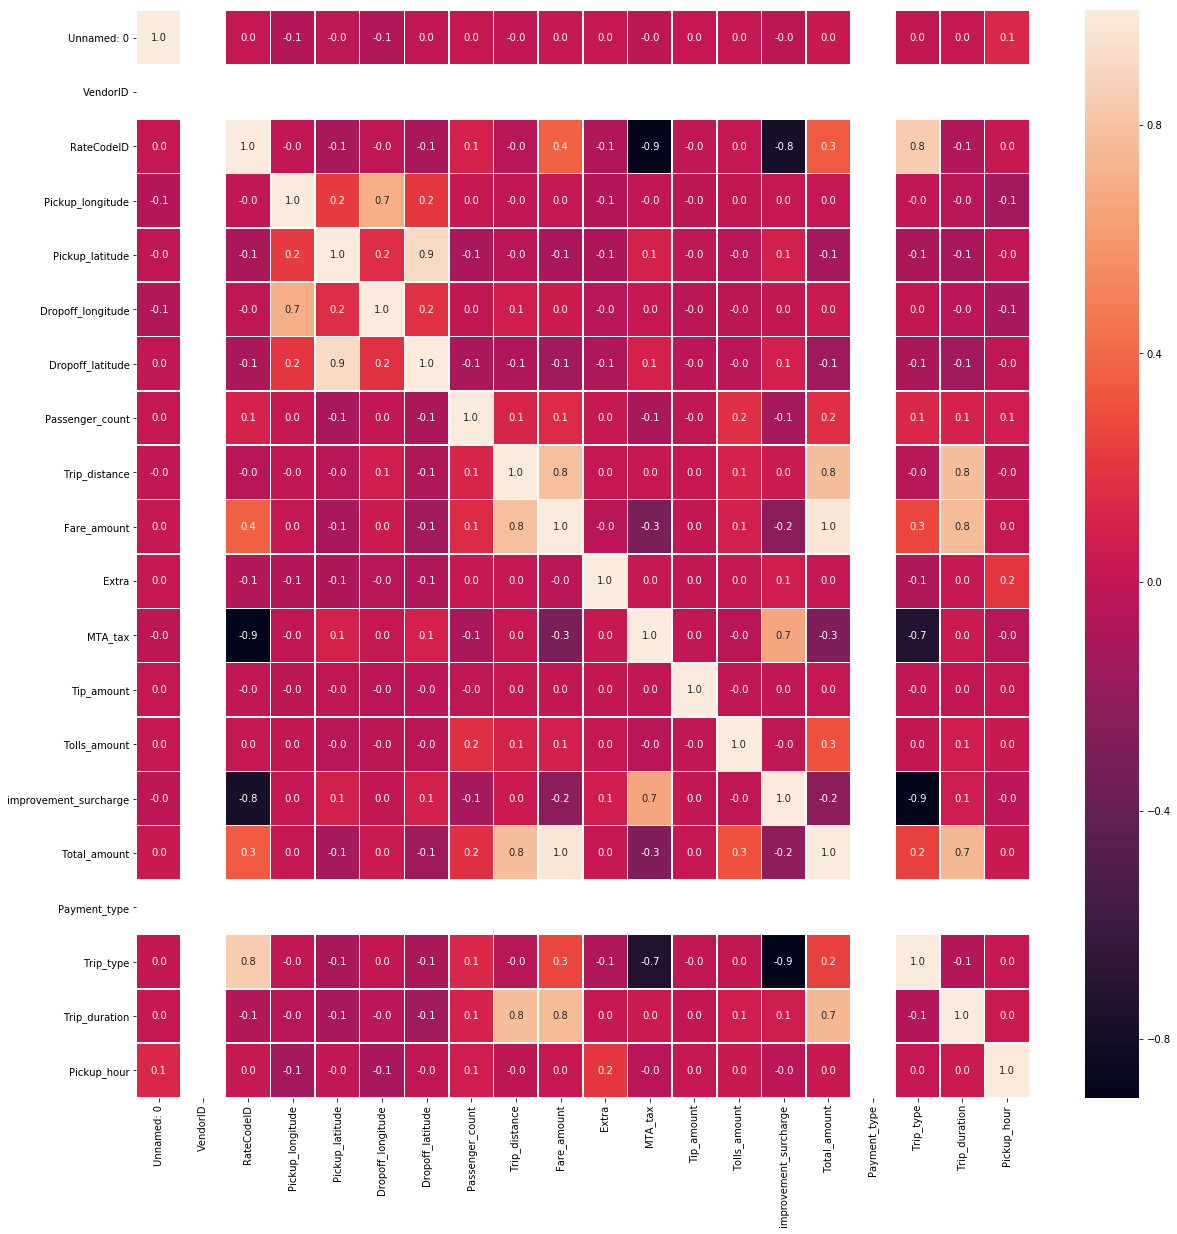

In [23]:
payment_type_four = data.Payment_type == 4

f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(data[payment_type_four].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

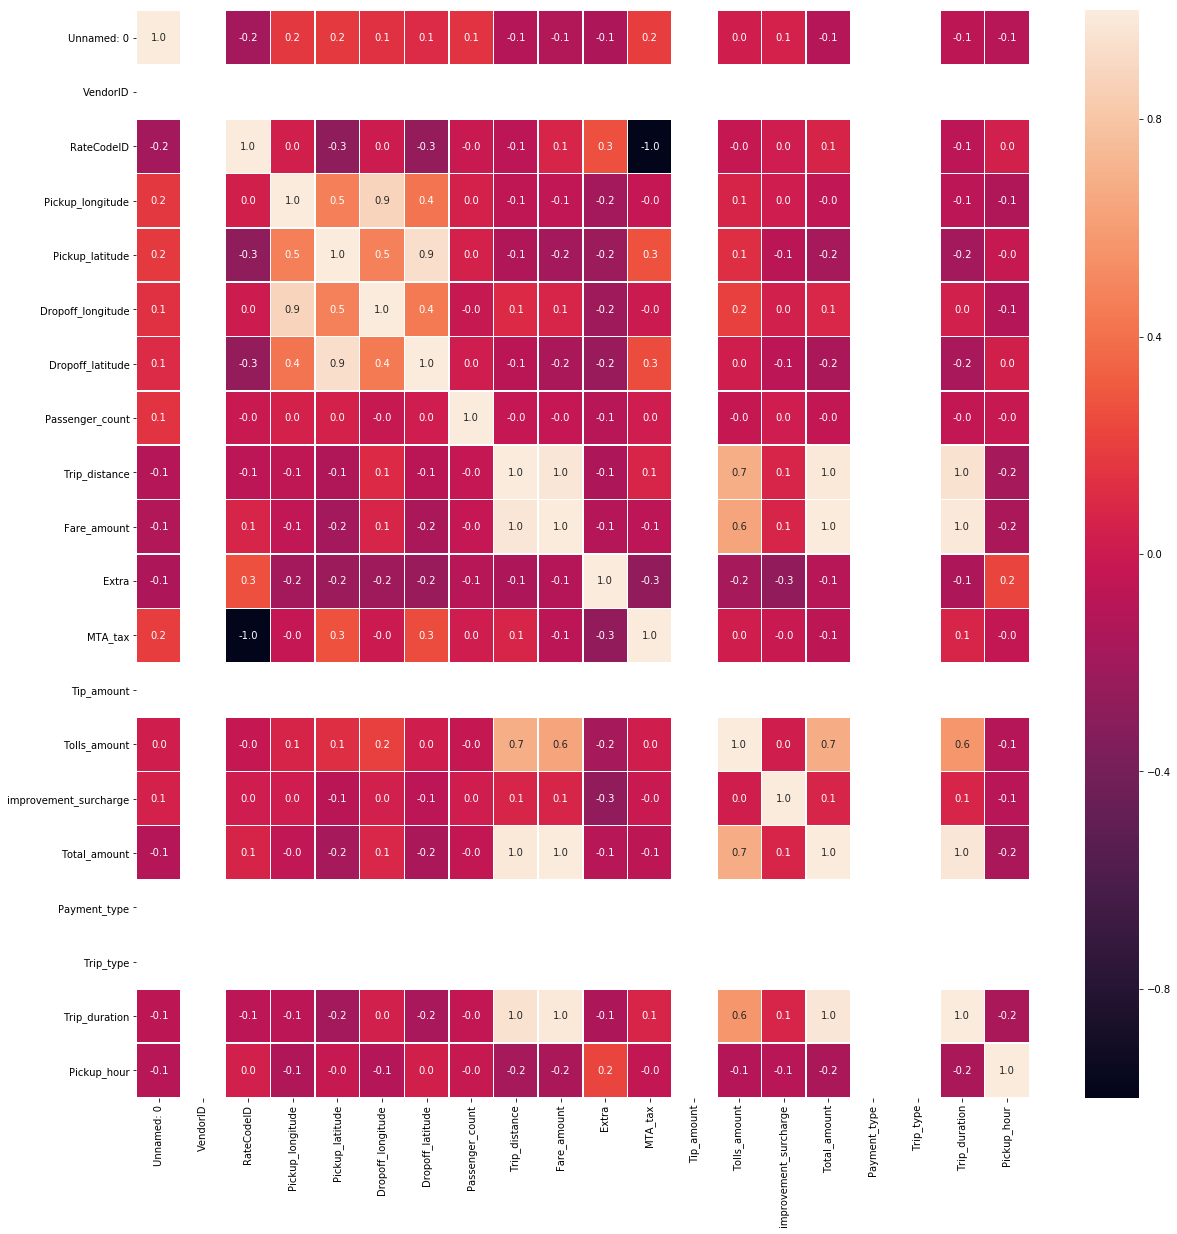

In [24]:
payment_type_five = data.Payment_type == 5

f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(data[payment_type_five].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

There are too many 0 values in tip amount. In this part, I looked correlations for two situations. 1) Tip amount = 0, 2)Tip amount != 0. As can be seen from the heatmap, for the first situation, no value can be calculated. For the second situation, I obtained much more strong correlations. I will build my predictive model on these variables. These variables are Fare amount, Total amount and trip distance.

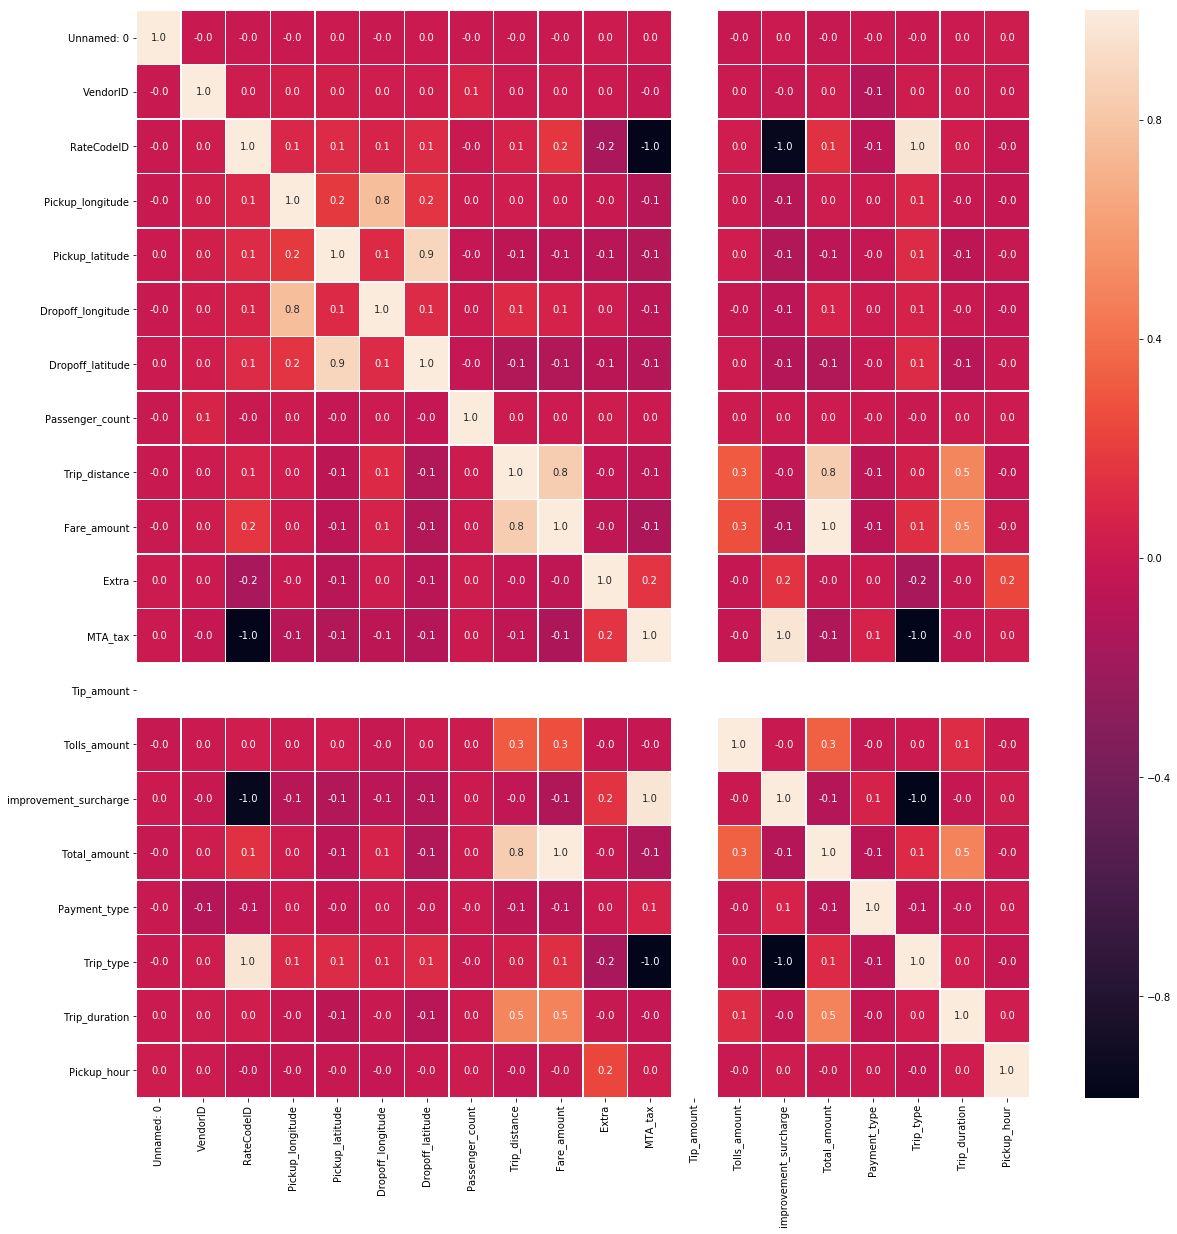

In [26]:
tip_amount_zero = data.Tip_amount == 0

f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(data[tip_amount_zero].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [28]:
data[tip_amount_zero].info ()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 875265 entries, 1 to 1474273
Data columns (total 23 columns):
Unnamed: 0               875265 non-null int64
VendorID                 875265 non-null int64
Pickup_datetime          875265 non-null object
Dropoff_datetime         875265 non-null object
Store_and_fwd_flag       875265 non-null object
RateCodeID               875265 non-null int64
Pickup_longitude         875265 non-null float64
Pickup_latitude          875265 non-null float64
Dropoff_longitude        875265 non-null float64
Dropoff_latitude         875265 non-null float64
Passenger_count          875265 non-null int64
Trip_distance            875265 non-null float64
Fare_amount              875265 non-null float64
Extra                    875265 non-null float64
MTA_tax                  875265 non-null float64
Tip_amount               875265 non-null float64
Tolls_amount             875265 non-null float64
improvement_surcharge    875265 non-null float64
Total_amount     

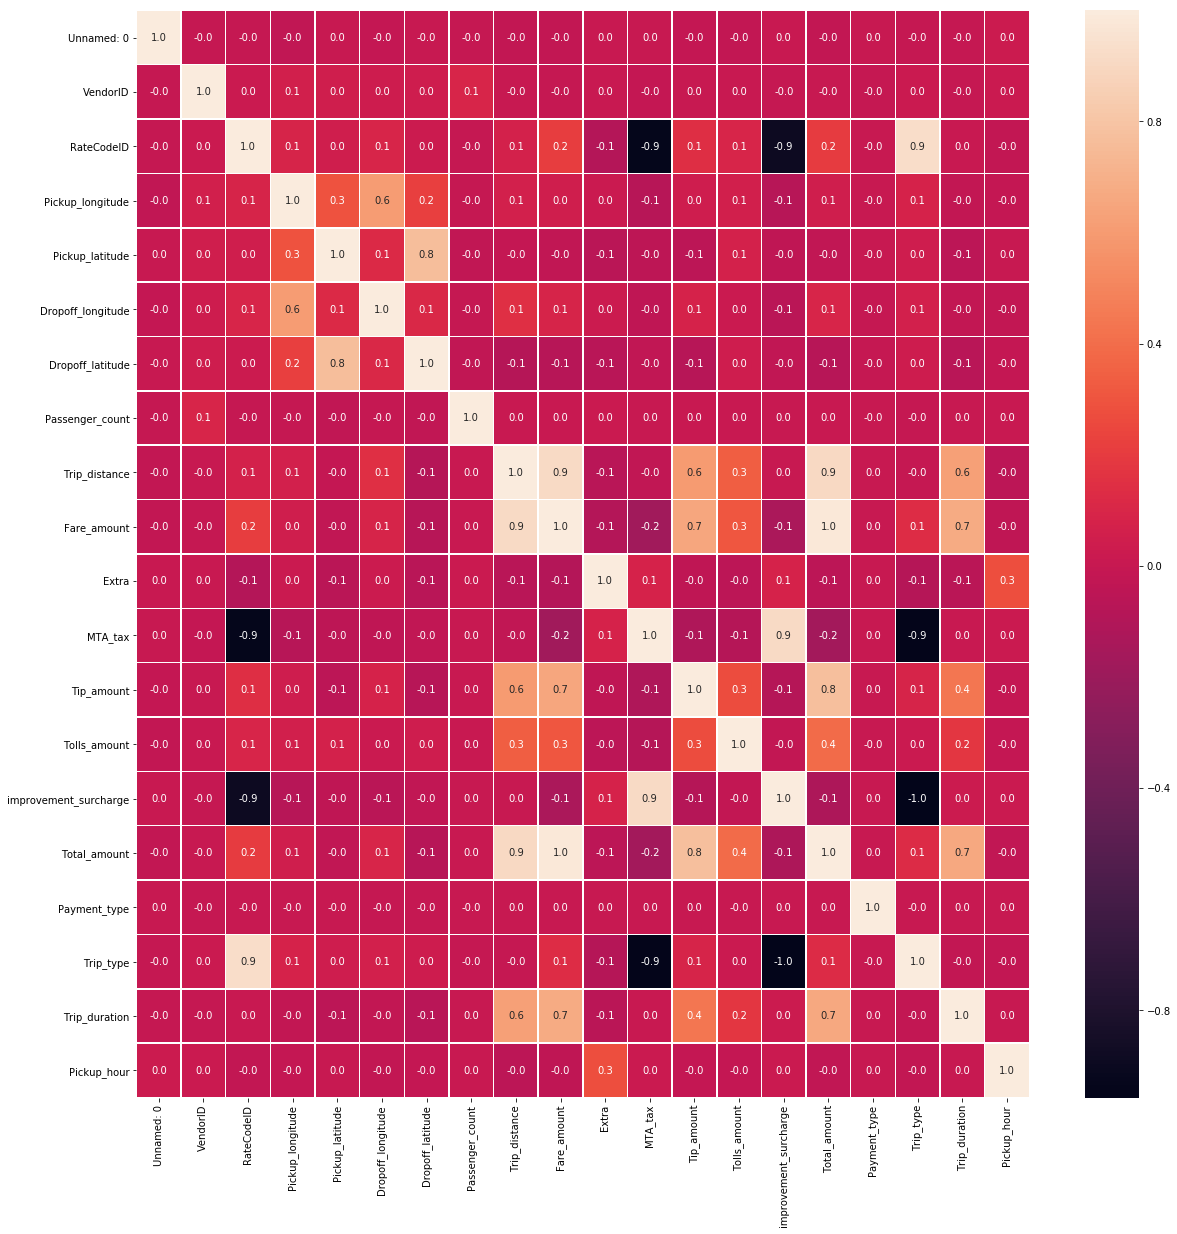

In [29]:
tip_amount_notzero = data.Tip_amount != 0

f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(data[tip_amount_notzero].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

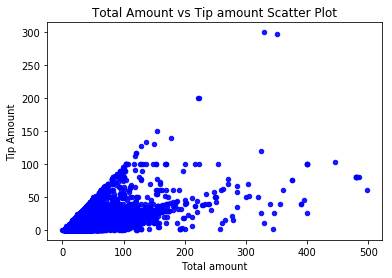

In [30]:
# x = Total amount , y = tip amount
data[tip_amount_notzero].plot(kind='scatter', x='Total_amount', y='Tip_amount',alpha = 0.9,color = 'blue')
plt.xlabel('Total amount')              # label = name of label
plt.ylabel('Tip Amount')
plt.title('Total Amount vs Tip amount Scatter Plot')            # title = title of plot
plt.show ()

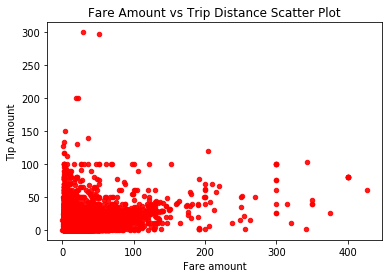

In [31]:
# x = Fare amount , y = tip amount
data[tip_amount_notzero].plot(kind='scatter', x='Fare_amount', y='Tip_amount',alpha = 0.9,color = 'red')
plt.xlabel('Fare amount')              # label = name of label
plt.ylabel('Tip Amount')
plt.title('Fare Amount vs Trip Distance Scatter Plot')            # title = title of plot
plt.show ()

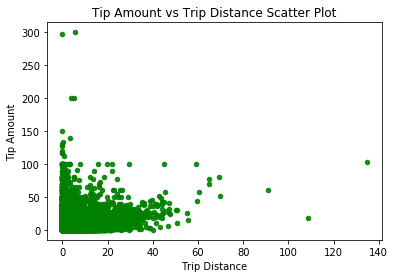

In [32]:
# Scatter Plot 
# x = Trip duration , y = tip amount
data[tip_amount_notzero].plot(kind='scatter', x='Trip_distance', y='Tip_amount',alpha = 0.9,color = 'green')
plt.xlabel('Trip Distance')              # label = name of label
plt.ylabel('Tip Amount')
plt.title('Tip Amount vs Trip Distance Scatter Plot')            # title = title of plot
plt.show ()

In this part, I tried to calculate correlations by using some filters. but at the end, I saw that there is not big changes after these filters.

In [33]:
tip_amount_smaller_than_150 = data.Tip_amount <=150
trip_dist_smaller_than_80 = data.Trip_distance <= 80
all_filters = tip_amount_notzero & tip_amount_smaller_than_150 & trip_dist_smaller_than_80

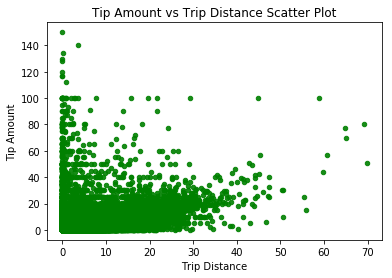

In [34]:
# Scatter Plot 
# x = Trip duration , y = tip amount
data[all_filters].plot(kind='scatter', x='Trip_distance', y='Tip_amount',alpha = 0.9,color = 'green')
plt.xlabel('Trip Distance')              # label = name of label
plt.ylabel('Tip Amount')
plt.title('Tip Amount vs Trip Distance Scatter Plot')            # title = title of plot
plt.show ()

In [35]:
data[all_filters].corr()

,Unnamed: 0,VendorID,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,improvement_surcharge,Total_amount,Payment_type,Trip_type,Trip_duration,Pickup_hour
Unnamed: 0,1.000000,-0.001558,-0.005166,-0.026006,0.002792,-0.012096,-0.000398,-0.007114,-0.022922,-0.018822,0.010583,0.004999,-0.013151,-0.018364,0.008096,-0.019387,0.001652,-0.005503,-0.006558,0.024012
VendorID,-0.001558,1.000000,0.017605,0.052698,0.048528,0.034766,0.037892,0.096049,-0.001134,-0.003276,0.012406,-0.014616,0.005277,0.010021,-0.006503,-0.000347,-0.003062,0.017709,-0.003757,0.013976
RateCodeID,-0.005166,0.017605,1.000000,0.089684,0.048412,0.096414,0.023238,-0.003423,0.069052,0.207750,-0.088332,-0.936151,0.142112,0.095505,-0.890213,0.200385,-0.000159,0.927265,0.006041,-0.019834
Pickup_longitude,-0.026006,0.052698,0.089684,1.000000,0.290796,0.605933,0.219967,-0.003232,0.064419,0.047281,0.016493,-0.071378,0.040695,0.054561,-0.073934,0.052033,-0.000089,0.076671,-0.017780,-0.012454
Pickup_latitude,0.002792,0.048528,0.048412,0.290796,1.000000,0.118435,0.770519,-0.029568,-0.012593,-0.028759,-0.056561,-0.040715,-0.051672,0.068672,-0.037520,-0.030769,-0.000080,0.041421,-0.051175,0.001404
Dropoff_longitude,-0.012096,0.034766,0.096414,0.605933,0.118435,1.000000,0.108928,-0.004736,0.141292,0.086588,0.027371,-0.034317,0.074933,0.014226,-0.062538,0.088520,-0.003252,0.064625,-0.023315,-0.024201
Dropoff_latitude,-0.000398,0.037892,0.023238,0.219967,0.770519,0.108928,1.000000,-0.024456,-0.081925,-0.077717,-0.062672,-0.029207,-0.079422,0.042304,-0.031378,-0.078956,-0.001540,0.034535,-0.067294,-0.009071
Passenger_count,-0.007114,0.096049,-0.003423,-0.003232,-0.029568,-0.004736,-0.024456,1.000000,0.009892,0.009062,0.018341,0.003111,0.010018,0.008024,0.003829,0.010787,-0.000191,-0.003206,0.005383,0.011307
Trip_distance,-0.022922,-0.001134,0.069052,0.064419,-0.012593,0.141292,-0.081925,0.009892,1.000000,0.915641,-0.067311,-0.031345,0.610920,0.336395,0.002892,0.903936,0.003053,-0.003005,0.617811,-0.047542
Fare_amount,-0.018822,-0.003276,0.207750,0.047281,-0.028759,0.086588,-0.077717,0.009062,0.915641,1.000000,-0.088123,-0.171945,0.666672,0.311685,-0.129633,0.981217,0.002563,0.134351,0.679129,-0.036281


In [36]:
data[all_filters].shape

(599004, 23)

In [37]:
data.shape

(1474276, 23)

# Logistic Regression

In this part, I create a new variable Tip_bin for a binary variable. there is tip and no tip. I did logistic regression in order to find which variables increase the chance of getting tip. It is not for predicting the amount, but it is for predicting whether there will be tip or not. 

In [38]:
data['Tip_bin'] = [0 if i==0 else 1 for i in data.Tip_amount] # making data binary, I made a new column Tip_bin in order to use logistic Regression

In [39]:
data.head (5)

,Unnamed: 0,VendorID,Pickup_datetime,Dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,...,MTA_tax,Tip_amount,Tolls_amount,improvement_surcharge,Total_amount,Payment_type,Trip_type,Trip_duration,Pickup_hour,Tip_bin
0,0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,...,0.0,1.95,0.0,0.0,9.75,1,2,0.066667,0,1
1,1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,...,0.0,0.00,0.0,0.0,45.00,1,2,0.066667,0,0
2,2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,...,0.5,0.50,0.0,0.3,5.80,1,1,2.566667,0,1
3,3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,...,0.5,0.00,0.0,0.3,6.30,2,1,4.100000,0,0
4,4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,...,0.5,0.00,0.0,0.3,6.30,2,1,4.100000,0,0


In order to do logistic Reg. first I took continous variables as x, and binary tip variable for y. Then I conducted the analysis and calculated the confusion matrix. By using that data, I obtained higher precision, and accuracy values. 

In [40]:
X = data.iloc[:,[6,7,8,9,10,11,12,13,14,16,17,18,19,20,21,22]]
y = data.loc[:,"Tip_bin"]

In [41]:
X.head(5)

,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tolls_amount,improvement_surcharge,Total_amount,Payment_type,Trip_type,Trip_duration,Pickup_hour
0,-73.979485,40.684956,-73.979431,40.685020,1,0.00,7.8,0.0,0.0,0.0,0.0,9.75,1,2,0.066667,0
1,-74.010796,40.912216,-74.010780,40.912212,1,0.00,45.0,0.0,0.0,0.0,0.0,45.00,1,2,0.066667,0
2,-73.921410,40.766708,-73.914413,40.764687,1,0.59,4.0,0.5,0.5,0.0,0.3,5.80,1,1,2.566667,0
3,-73.921387,40.766678,-73.931427,40.771584,1,0.74,5.0,0.5,0.5,0.0,0.3,6.30,2,1,4.100000,0
4,-73.955482,40.714046,-73.944412,40.714729,1,0.61,5.0,0.5,0.5,0.0,0.3,6.30,2,1,4.100000,0


In [42]:
y.head(5)

0    1
1    0
2    1
3    0
4    0
Name: Tip_bin, dtype: int64

In [43]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size= 0.3, random_state=0)

In [44]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

C:\Users\HYDR5\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [45]:
print (lr.coef_)
print (lr.intercept_)

[[-3.03358664e-02 -4.69244562e-01 -5.45393931e-01 -7.24471844e-01
  -3.52525651e-02 -9.80294961e-03 -1.33908291e+01 -1.34431204e+01
  -4.08620682e+00 -1.33688096e+01 -2.70735762e+00  1.33887203e+01
  -1.22200088e+01  7.34632828e+00 -3.27857062e-03 -5.64047945e-03]]
[-0.00799347]


In [46]:
y_pred = lr.predict (X_test)

In [47]:
confusion_matrix (y_test, y_pred)

array([[262273,     24],
       [  1051, 178935]], dtype=int64)

In [48]:
type(y_pred)

numpy.ndarray

In [49]:
print ("Accuracy:", sklearn.metrics.accuracy_score (y_test,y_pred))
print ("Precision:", sklearn.metrics.precision_score (y_test,y_pred))
print ("Recall:", sklearn.metrics.recall_score (y_test,y_pred))

Accuracy: 0.9975694295281528
Precision: 0.9998658910700217
Recall: 0.9941606569399842


# Linear Regression 

# #  Linear Regression with non-zero values

In this part by using only non-zero tip amount values, I will calculate a linear regression prediction. Then I will check it by using all values.

In [52]:
X1 = data.loc[:,["Fare_amount","Total_amount","Trip_distance"]]
y1 = data.loc[:,"Tip_amount"]

In [53]:
X1.head(5)

,Fare_amount,Total_amount,Trip_distance
0,7.8,9.75,0.00
1,45.0,45.00,0.00
2,4.0,5.80,0.59
3,5.0,6.30,0.74
4,5.0,6.30,0.61


In [54]:
y1.head (5)

0    1.95
1    0.00
2    0.50
3    0.00
4    0.00
Name: Tip_amount, dtype: float64

In [55]:
X1_train, X1_test, y1_train, y1_test = train_test_split (X1[tip_amount_notzero], y1[tip_amount_notzero], test_size= 0.3, random_state=0)

In [56]:
# Linear Regression
lin_reg=LinearRegression()
lin_reg.fit (X1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [57]:
print (lin_reg.intercept_)
print (lin_reg.coef_)

-0.6982583193365683
[-0.73597236  0.78331333 -0.10403289]


In [58]:
y1_pred = lin_reg.predict (X1_test)

In [59]:
print ("MAE:",sklearn.metrics.mean_absolute_error (y1_test, y1_pred))
print ("MSE:",sklearn.metrics.mean_squared_error (y1_test, y1_pred))
print ("RMSE:",np.sqrt(sklearn.metrics.mean_squared_error (y1_test, y1_pred)))


MAE: 0.45744213671386424
MSE: 0.8515754512287397
RMSE: 0.9228084585810533


In [60]:
data['predicted_val'] = -0.6982583193365683-0.73597236*data['Fare_amount']+0.78331333*data['Total_amount']-0.10403289*data['Trip_distance']

In [61]:
data.predicted_val.head (5)

0    1.198462
1    1.432085
2    0.839690
3    0.479770
4    0.493294
Name: predicted_val, dtype: float64

MAE, MSE and RMSE values for Predicted values and tip amount of all data.

In [62]:
print ("MAE:",sklearn.metrics.mean_absolute_error (data['predicted_val'], data['Tip_amount']))
print ("MSE:",sklearn.metrics.mean_squared_error (data['predicted_val'], data['Tip_amount']))
print ("RMSE:",np.sqrt(sklearn.metrics.mean_squared_error (data['predicted_val'], data['Tip_amount'])))


MAE: 0.5076033191847752
MSE: 0.8019415826598298
RMSE: 0.8955119109536342


# #  Linear Regression with all tip amount values

In this part by using all tip amount values, I will calculate a linear regression prediction. Then I will check it by using all values.

In [63]:
#linear regression version 2
X2_train, X2_test, y2_train, y2_test = train_test_split (X1, y1, test_size= 0.3, random_state=0)

In [64]:
lin_reg2=LinearRegression()
lin_reg2.fit (X2_train, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [65]:
print (lin_reg2.intercept_)
print (lin_reg2.coef_)

-0.8418804924572094
[-0.81448924  0.8304964  -0.06649725]


In [66]:
y2_pred = lin_reg2.predict (X2_test)

In [67]:
print ("MAE:",sklearn.metrics.mean_absolute_error (y2_test, y2_pred))
print ("MSE:",sklearn.metrics.mean_squared_error (y2_test, y2_pred))
print ("RMSE:",np.sqrt(sklearn.metrics.mean_squared_error (y2_test, y2_pred)))

MAE: 0.4433724930126658
MSE: 0.6641938773731313
RMSE: 0.8149809061402183


In [68]:
data['predicted_val2'] = -0.8418804924572094-0.81448924*data['Fare_amount']+0.8304964*data['Total_amount']-0.06649725*data['Trip_distance']

MAE, MSE and RMSE values for Predicted values and tip amount of all data. 

In [70]:
print ("MAE2:",sklearn.metrics.mean_absolute_error (data['predicted_val2'], data['Tip_amount']))
print ("MSE2:",sklearn.metrics.mean_squared_error (data['predicted_val2'], data['Tip_amount']))
print ("RMSE2:",np.sqrt(sklearn.metrics.mean_squared_error (data['predicted_val2'], data['Tip_amount'])))


MAE2: 0.4437589414388186
MSE2: 0.6681368470895814
RMSE2: 0.8173963830905917


As a result, the model of the linear regression 1 has higher MSE and RMSE results compared to the second one. 
The prediction model for Tip amount is:

Tip_amount_pred = -0.6982583193365683-0.73597236*Fare_amount+0.78331333*Total_amount-0.10403289*Trip_distance
